## Used Car Pricing Estimator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the car's prices is affected by other variables such as Make, Number ofDoors, Body Style, Engine Type, Number of Cylinders, Horsepower, Peak RPM, etc.



### 2) Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/automobile.csv')

#### Show Top 5 Records

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Shape of the dataset

In [4]:
df.shape

(201, 29)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Checking and defining numerical & categorical columns
- Find the correlation between the columns

### 3.1 Check Missing values

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

#### There are two columns with missing values in the data set.

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
city-L/100km          29
horsepower-binned      3
diesel                 2
gas                    2
dtype: int64

### 3.5 Checking and defining numerical & categorical columns

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 19 numerical features : ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas']

We have 10 categorical features : ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']


### 3.6 Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [10]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2 id="pattern_visualization">4. Analyzing Individual Feature Patterns Using Visualization</h2>

<h3>4.1 Continuous Numerical Variables:</h3> 

##### 4.1.1 Visualize scatterplot of "engine-size" and "price". 

(0.0, 53184.309660105224)

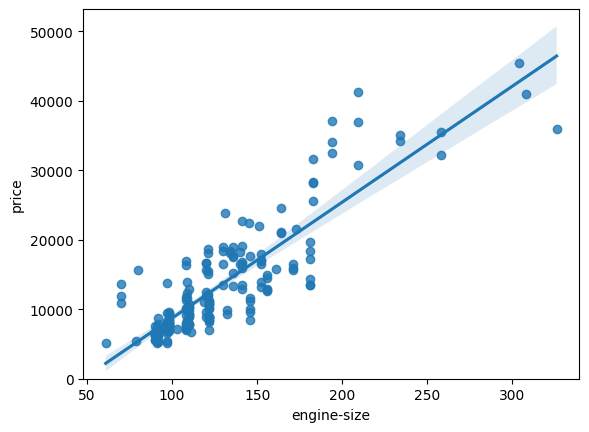

In [11]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#### Insights 
- As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [12]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


 #### Insights 
 - We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.88.

#### 4.1.2 Visualize scatterplot of "highway-mpg" and "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

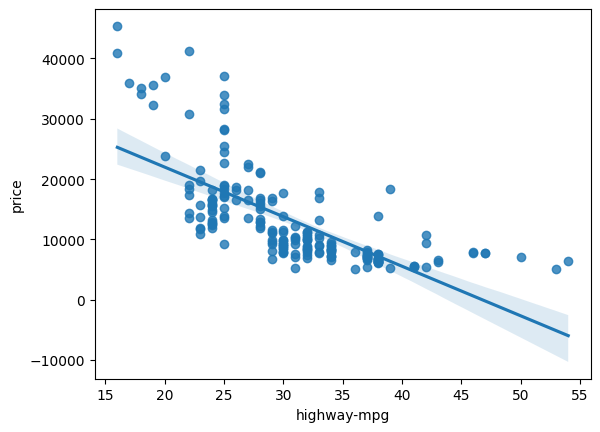

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)

#### Insights 
- As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [14]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Insights 
- We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.707.

#### 4.1.3 Visualize scatterplot of "peak-rpm" and "price".

<Axes: xlabel='peak-rpm', ylabel='price'>

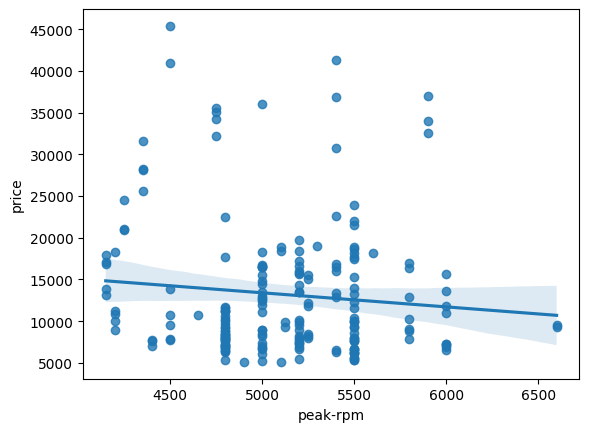

In [15]:
sns.regplot(x="peak-rpm", y="price", data=df)

#### Insights 
- Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

In [16]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


#### Insights 
- We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.103616.

#### 4.1.4 Visualize scatterplot of "price" and "stroke"

<Axes: xlabel='stroke', ylabel='price'>

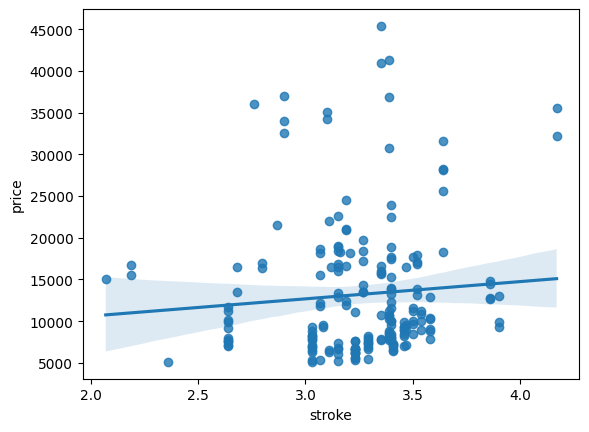

In [17]:
sns.regplot(x="stroke", y="price", data=df)

In [18]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


#### Insights 
- We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.107.

<h3>4.2 Categorical Variables</h3>

#### 4.2.1 Relationship between "body-style" and "price".

<Axes: xlabel='body-style', ylabel='price'>

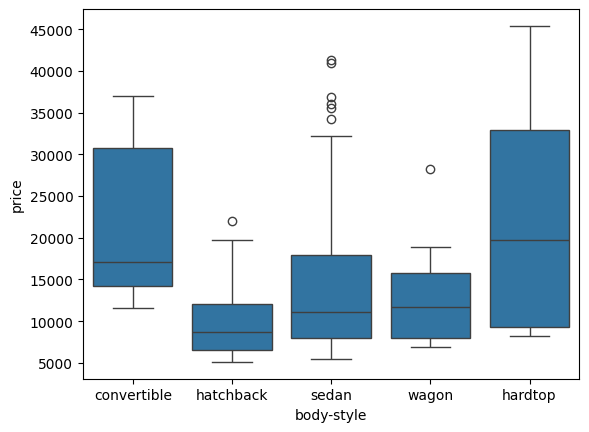

In [19]:
sns.boxplot(x="body-style", y="price", data=df)

#### Insights 
- We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

#### 4.2.2 Relationship between "engine-location" and "price".

<Axes: xlabel='engine-location', ylabel='price'>

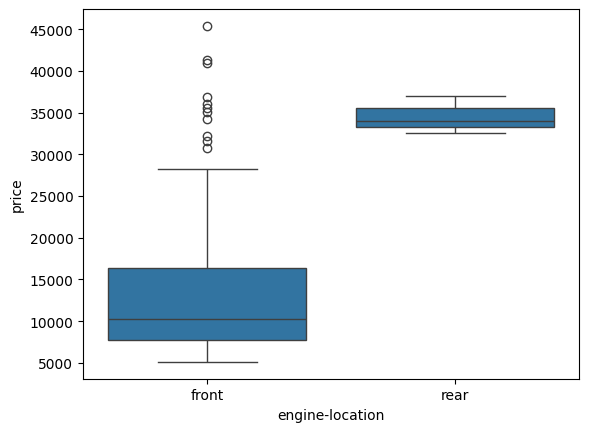

In [20]:
sns.boxplot(x="engine-location", y="price", data=df)

#### Insights 
- Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

#### 4.2.3 Relationship between "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

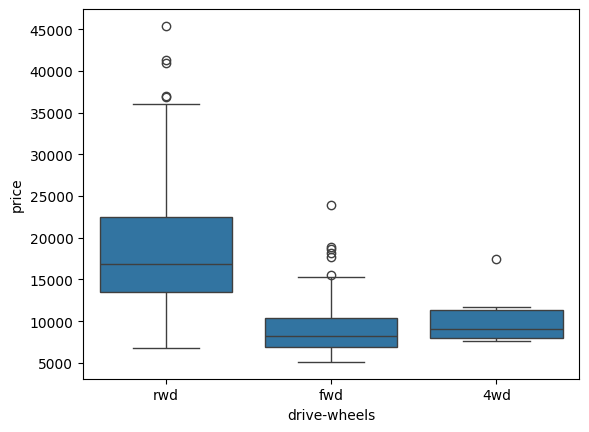

In [21]:
sns.boxplot(x="drive-wheels", y="price", data=df)

#### Insights 
- Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

<h2 id="pattern_visualization">5. Value Counts</h2>

We can convert the series to a dataframe as follows:

In [22]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

In [23]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Now let's rename the index to 'drive-wheels':

In [24]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [25]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


#### Insights 
- After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 193 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.


<h2 id="pattern_visualization">6. Grouping</h2>

Group by the variable "drive-wheels". 

In [26]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [27]:
df_group_one = df[['drive-wheels', 'price']]

Calculate the average price for each of the different categories of data.

In [28]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


#### Insights 
- From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

<h2 id="pattern_visualization">7. Correlation and Causation</h2>

In [29]:
from scipy import stats

<h3 id="pattern_visualization">7.1. Wheel-Base vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [30]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


#### Insights 
- <p>Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.591).</p>

<h3 id="pattern_visualization">7.2. Horsepower vs. Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [31]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259526e-48


<h4>Insights</h4>

- Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.802, close to 1).

<h3 id="pattern_visualization">7.3. Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [32]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159153e-30


<h4>Insights</h4>

- Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.689).

<h3 id="pattern_visualization">7.4. Width vs. Price</h3>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [33]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.200335510482065e-38


#### Insights

- Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.744).

<h3 id="pattern_visualization">7.5. Curb-Weight vs. Price</h3>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [34]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53


<h4>Insights</h4>

- Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.828).

<h3 id="pattern_visualization">7.6. Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [35]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


<h4>Insights</h4>

- Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.889).

<h3 id="pattern_visualization">7.7. Bore vs. Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [36]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626604  with a P-value of P =   8.04918948393533e-17


<h4>Insights</h4>

- Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.544).

<h3 id="pattern_visualization">7.8. City-mpg vs. Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price':

In [37]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


<h4>Insights</h4>

- Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.692 shows that the relationship is negative and moderately strong.


<h3 id="pattern_visualization">7.9. Highway-mpg vs. Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price':

In [38]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476325e-31


#### Insights

- Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.707 shows that the relationship is negative and moderately strong.


<h2 id="pattern_visualization">8. Conclusions</h2>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
